In [2]:
import os
import math
import numpy as np
import pandas as pd
from scipy.io import loadmat, savemat
from factor_analyzer import FactorAnalyzer, calculate_bartlett_sphericity, calculate_kmo
import matplotlib.pyplot as plt
import pickle

In [3]:
def load_data(dataset):
    os.chdir('/home/nick/Documents/Hiwi/Data/Subject Data/Ehrlich 2016')
    if dataset == "TRAIN":
        data = loadmat(os.path.join(os.getcwd(), "Training_Data.mat"))
    elif dataset == "TEST":
        data = loadmat(os.path.join(os.getcwd(), "Test_Data.mat"))
    feats = data["feats"]
    labels = data["labels"]
    return feats, labels

In [41]:
x_train, y_train = load_data("TRAIN")
x_test, y_test = load_data("TEST")

In [15]:
print(x_train.shape)
print(y_train.shape)

(64, 51, 5325)
(5325, 1)


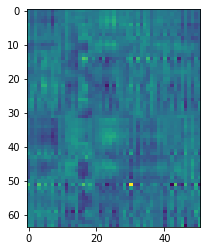

In [16]:
plt.imshow(x_train[:,:,51])

In [17]:
y_train[51]

array([1], dtype=int16)

In [42]:
# x_train = x_train[:, ::3]
x_train = x_train[(11, 12, 31, 32, 33, 34, 46, 47, 48, 49),:,:]

In [43]:
print(x_train.shape)

(10, 51, 5325)


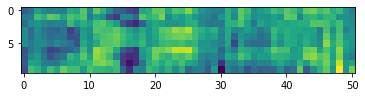

In [44]:
plt.imshow(x_train[:,:,51])

In [45]:
x_train = x_train.reshape((10*51,x_train.shape[2])).T
df = pd.DataFrame(x_train)
print(df.isnull().any().any())
print(x_train.shape)

False
(5325, 510)


In [46]:
kmo_all,kmo_model=calculate_kmo(x_train)
kmo_model

/home/nick/anaconda3/lib/python3.7/site-packages/factor_analyzer/utils.py:248: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn('The inverse of the variance-covariance matrix '


0.7412277697783417

In [47]:
fa = FactorAnalyzer(n_factors=8, rotation=None)
fa.fit(x_train)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=8, rotation=None, rotation_kwargs={},
               use_smc=True)

In [48]:
ev, v = fa.get_eigenvalues()

In [54]:
np.sum(ev>10)

11

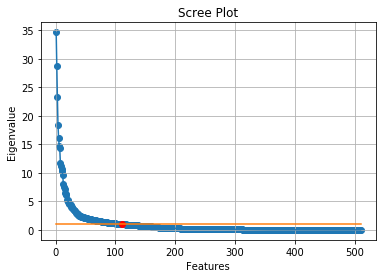

In [55]:
plt.scatter(range(1,x_train.shape[1]+1),ev)
plt.plot(range(1,x_train.shape[1]+1),ev)
plt.plot(np.sum(ev>1), 1, 'ro')
plt.plot(range(1,x_train.shape[1]+1), np.ones(x_train.shape[1]))
plt.title('Scree Plot')
plt.xlabel('Features')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [82]:
fa = FactorAnalyzer(n_factors=11, rotation='varimax')
fa.fit(x_train)

In [85]:
ev, v = fa.get_eigenvalues()
np.sum(ev>1)

111

In [86]:
loadings = fa.loadings_
print(loadings.shape)
loadings

(510, 11)


array([[-0.02159319,  0.07544256,  0.5617826 , ..., -0.00686548,
        -0.14460534,  0.16592509],
       [-0.02428274,  0.04698303,  0.61678983, ..., -0.00630817,
        -0.144666  ,  0.17771798],
       [ 0.0026435 ,  0.03885391,  0.66151386, ..., -0.01979755,
        -0.07878197,  0.15525972],
       ...,
       [-0.02810969, -0.01589536,  0.00244192, ...,  0.05299917,
        -0.02791246, -0.06735382],
       [-0.01819984,  0.00567126, -0.00706125, ...,  0.03987617,
        -0.00735145, -0.06253145],
       [-0.00866784,  0.01038316, -0.01953727, ...,  0.04880343,
        -0.04848344, -0.04901066]])

(510,)


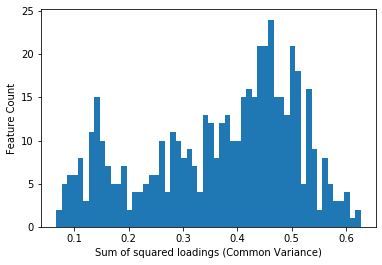

In [87]:
communalities = fa.get_communalities()
print(communalities.shape)
plt.hist(communalities, bins=np.arange(min(communalities), max(communalities) + 0.01, 0.01))
plt.xlabel('Sum of squared loadings (Common Variance)')
plt.ylabel('Feature Count')
plt.show()

In [88]:
# x_test = x_test[(11, 12, 31, 32, 33, 34, 46, 47, 48, 49),:,:]
# x_test = x_test.reshape(10*51, x_test.shape[2])

IndexError: too many indices for array

In [92]:
print(x_train.shape)
print(x_test.shape)
print(loadings.shape)


(5325, 510)
(496, 510)
(510, 11)


In [93]:
x_trainR = fa.transform(x_train)
x_testR = fa.transform(x_test)
print(x_trainR.shape)
print(x_testR.shape)

(5325, 11)
(496, 11)


Error Trial


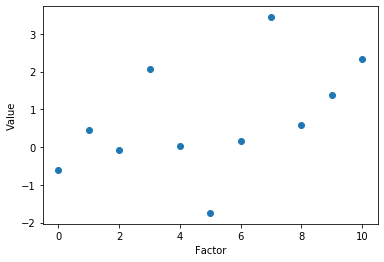

In [95]:
plt.scatter(np.arange(11), x_trainR[58,:])
plt.xlabel("Factor")
plt.ylabel("Value")
if y_train[58].item() == 1:
    print("Error Trial")
else:
    print("Non-Error Trial")

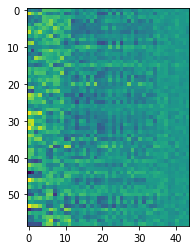

In [40]:
x_rotated = x_rotated.T
plt.imshow(x_rotated[1:60, :])

In [53]:
os.chdir('/home/nick/Documents/Hiwi/Factor Analysis/Factors')
savemat(os.path.join(os.getcwd(), "Training_Data.mat"), {"feats": x_rotated, "labels": y_train})

In [7]:
N_FACTORS = 80

# Load factor analysis model
os.chdir('/home/nick/Documents/Hiwi/Factor Analysis/Models')
filename = open(os.path.join(os.getcwd(), "FA-{}_Chavarriaga2015.obj".format(N_FACTORS)), 'rb') 
fa_train = pickle.load(filename)

In [8]:
ev, v = fa_train.get_eigenvalues()
print("Optimal Number Factors: {}".format(np.sum(ev>1)))

Optimal Number Factors: 95
